<a href="https://colab.research.google.com/github/annice6/Program-for-Data-Analytics-Project-1/blob/main/2A_1)_KNN_obesity__PICKLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project #2A-1) Classification**

**Q1,2) Select datasets, Load DataFrames**

In [ ]:
#import libaries
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

In [ ]:
#read data from a csv file into pandas dataframe

# https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset #
obesity = pd.read_csv('/Obesity Classification.csv')


In [ ]:
#drop the ID column, not needed, too much information
obesity.drop(columns=['ID'], inplace=True)
obesity.drop(columns=['Gender'], inplace=True)

In [ ]:
# #view dataframe of just the first five rows
obesity.head()

,Age,Height,Weight,BMI,Label
0,25,175,80,25.3,Normal Weight
1,30,160,60,22.5,Normal Weight
2,35,180,90,27.3,Overweight
3,40,150,50,20.0,Underweight
4,45,190,100,31.2,Obese


In [ ]:
#see how many data in total , 108 rows, 6 columns
obesity.shape

(108, 5)

In [ ]:
#Checking the distribution of categorical data
print(obesity.Label.value_counts())

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(obesity.Age.value_counts())

25    2
22    2
52    2
47    2
42    2
     ..
59    1
62    1
67    1
72    1
11    1
Name: Age, Length: 75, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(obesity.Height.value_counts())

175    12
160    12
180    12
190    12
150    11
140    10
200    10
130    10
210    10
120     9
Name: Height, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(obesity.Weight.value_counts())

75     9
30     8
55     8
85     8
65     7
50     6
25     6
40     6
35     5
45     5
20     5
95     5
15     4
60     4
105    3
80     3
110    3
100    3
90     3
70     2
120    2
10     2
115    1
Name: Weight, dtype: int64


In [ ]:
#Checking the distribution of categorical data
print(obesity.BMI.value_counts())

16.7    11
21.2     8
13.3     8
22.7     7
10.0     7
20.0     6
18.7     5
24.2     5
26.1     5
5.6      4
8.3      4
22.5     4
27.0     4
25.0     4
28.9     3
27.5     3
25.3     3
34.2     3
31.2     3
27.3     3
23.4     2
37.2     2
3.9      2
30.8     1
29.1     1
Name: BMI, dtype: int64


**Q3) Data Visualizations**

In [ ]:
obesity.corr()

<ipython-input-109-a99ff4e44dc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  obesity.corr()


,Age,Height,Weight,BMI
Age,1.000000,-0.076896,0.465106,0.474185
Height,-0.076896,1.000000,0.428890,0.354340
Weight,0.465106,0.428890,1.000000,0.972829
BMI,0.474185,0.354340,0.972829,1.000000


<ipython-input-112-6fe462a428b6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity.corr())


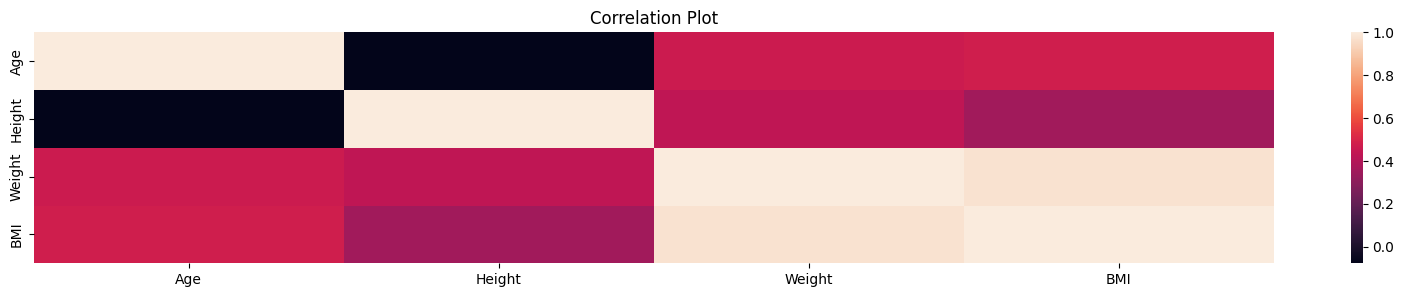

In [ ]:
# Data Visualization #1 : Correlation Matrix
#pandas has a .corr() method which returns a correlation matrix
#we will pass the correlation matrix to a seaborn heatmap method to generate the graphic

sns.heatmap(obesity.corr())
plt.title('Correlation Plot')
plt.show()

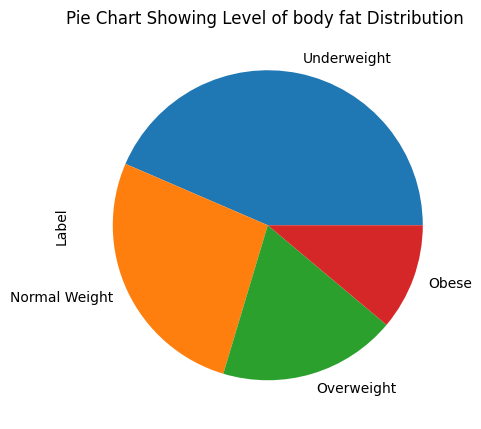

In [ ]:
# Data Visualization #2 : Pie Chart
#Plotting the distribution of the Diff level of body fat
data = obesity.Label.value_counts()
Label_count  = obesity['Label'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Level of body fat Distribution ')
plt.show()

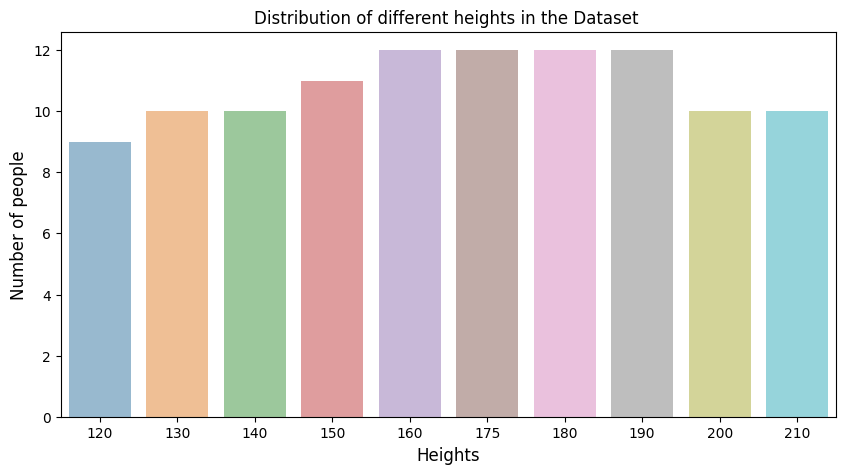

In [ ]:
# Data Visualization #3 : Bar Chart
#Plotting the distribution of the Proerpty Types to show
Height_count  = obesity['Height'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = Height_count.index, y= Height_count.values,  alpha=0.5)
plt.title('Distribution of different heights in the Dataset ')
plt.ylabel('Number of people', fontsize=12)
plt.xlabel('Heights', fontsize=12)
plt.show()

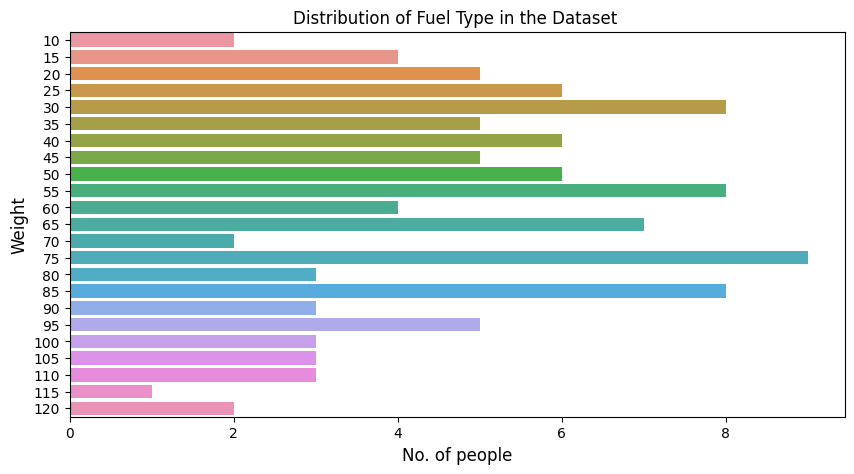

In [ ]:
# Data Visualization #4 : Bar Chart (horizontal)
#Plotting the distribution of the the properties in 5 cities
Weight_count  = obesity['Weight'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= Weight_count.values, y = Weight_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Fuel Type in the Dataset ')
plt.ylabel('Weight', fontsize=12)
plt.xlabel('No. of people', fontsize=12)
plt.show()

**Q4-5) Standardization, models fit to training data**

In [ ]:
#See what data types are there store in the dataframe
#Let's learn some more about the dataset
#The object data types are categorical data
# 1 columsn of float, 1 column of strings, 3 column of integers
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Height  108 non-null    int64  
 2   Weight  108 non-null    int64  
 3   BMI     108 non-null    float64
 4   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ KB


In [ ]:
#Seperate features from labels
#Note the use of .vales and
#.values is used to extract the dataframe values to a numpy array
X = obesity[['Age',	'Height',	'Weight','BMI']].values

In [ ]:
y = obesity[['Label']].values

In [ ]:
#Split dataset into training & Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
#with larger values, need to rescale data to align
#feature scaling = 1 method to rescale is standardize it
#Standardize dataset = scale all values in dataset (e.g. mean value is 0 & standard deviation is 1)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#import libaries
#Fitting (Training) the model to training dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Note here we are calling our model 'classifier.' In the titantic example, we called our model lr. This is your choice.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm


#Note: here we are calling our KNN model knn. This is your choice.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
#For a list of other distributions, see here: https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#Below we are experimenting with various SVMs and different parameters
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

**Q6-7) Perform corss validation, Predict using test data**

In [ ]:
#Perform 5-fold cross validation for KNN (k-nearest)
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7733333333333334


In [ ]:
#Perform 5-fold cross validation for GNB
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8933333333333333


In [ ]:
#Perform 5-fold cross validation on Linear SVM
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8933333333333333


In [ ]:
#Perform 5-fold cross valdation on RBF SVM
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7999999999999999


In [ ]:
#Perform 5-fold corss validation on Poly SVM
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8


In [ ]:
#Perform 5-fold cross validation on Sigmoid SVM
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 #what is underfitting?
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6666666666666667


In [ ]:
#perform stratified 10-fold cross validation for KNN
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

In [ ]:
#use model to make predictions
result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8678571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#Perform stratified 10-fold cross validation for GNB
#Note we don't need to import the StratifiedKfold library again as it was done previously
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9196428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#Perform stratified 10-fold cross validation for Linear SVM
result = cross_val_score(linear, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


 Avg accuracy:0.9321428571428572


In [ ]:
#Perform stratified 10-fold cross validation for RBF SVM
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


 Avg accuracy:0.8678571428571427


In [ ]:
#Perform stratified k-fold cross validation on Poly SVM
result = cross_val_score(poly, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


 Avg accuracy:0.825


In [ ]:
#Perform stratified k-fold cross validation on Sigmoid SVM
result = cross_val_score(sig, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7446428571428572


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#KNN - using model to make predictions on test datasets
# Predicting the Test set results
y_pred = knn.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y= knn.predict_proba(X_test)

In [ ]:
#the following 4, generate df show actual records + predicted output from model + probabilities
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['Underweight(%)', 'Normal Weight(%)', 'Overweight(%)','Obese(%)']])

In [ ]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [ ]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [ ]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [ ]:
# y_test = actual records  vs y_pred = predicted records from model
#other columsn = probabilites of predictions
comparison_of_true_pred
#In the table below we can see in row index 0, the model predicted that the flower was a 'virginica' with a ~96% probability

,y_test,y_pred,Underweight(%),Normal Weight(%),Overweight(%),Obese(%)
0,Underweight,Underweight,0.0,0.0,0.0,100.0
1,Normal Weight,Normal Weight,100.0,0.0,0.0,0.0
2,Normal Weight,Normal Weight,80.0,0.0,0.0,20.0
3,Overweight,Overweight,20.0,0.0,80.0,0.0
4,Obese,Obese,40.0,60.0,0.0,0.0
5,Underweight,Underweight,0.0,0.0,0.0,100.0
6,Underweight,Underweight,0.0,0.0,0.0,100.0
7,Underweight,Underweight,0.0,0.0,0.0,100.0
8,Obese,Obese,0.0,80.0,20.0,0.0
9,Underweight,Underweight,0.0,0.0,0.0,100.0


In [ ]:
#generating a confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 4,  3,  1,  0],
       [ 2,  0,  0, 12]])

**Q8) Generate Classification Reports**

In [ ]:
#import & print classification report for knn
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Normal Weight       0.50      1.00      0.67         6
        Obese       0.62      1.00      0.77         5
   Overweight       1.00      0.12      0.22         8
  Underweight       1.00      0.86      0.92        14

     accuracy                           0.73        33
    macro avg       0.78      0.75      0.65        33
 weighted avg       0.85      0.73      0.68        33



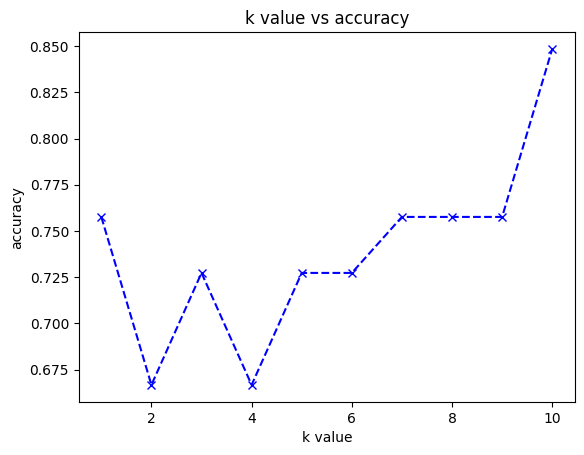

In [ ]:
# valus of accuracy change into in relation to K
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [ ]:
# Save the trained model and the scaler to files
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)


In [ ]:
#GNB - use model to make predictions on test datasets
# Predicting the Test set results
y_pred_gnb = gnb.predict(X_test)

In [ ]:
#GNH -- Classification Report
#Note - no need to import the classification_report libary again as it was done in the cell above
print(classification_report(y_test, y_pred_gnb))

               precision    recall  f1-score   support

Normal Weight       0.67      1.00      0.80         6
        Obese       1.00      1.00      1.00         5
   Overweight       1.00      0.75      0.86         8
  Underweight       1.00      0.93      0.96        14

     accuracy                           0.91        33
    macro avg       0.92      0.92      0.91        33
 weighted avg       0.94      0.91      0.91        33



In [ ]:
#Linear SVM -- Classification Report
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

               precision    recall  f1-score   support

Normal Weight       0.67      1.00      0.80         6
        Obese       0.71      1.00      0.83         5
   Overweight       1.00      0.50      0.67         8
  Underweight       1.00      0.93      0.96        14

     accuracy                           0.85        33
    macro avg       0.85      0.86      0.82        33
 weighted avg       0.90      0.85      0.84        33



In [ ]:
#Poly SVM -- Classification Report
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

               precision    recall  f1-score   support

Normal Weight       0.38      1.00      0.55         6
        Obese       1.00      1.00      1.00         5
   Overweight       1.00      0.25      0.40         8
  Underweight       1.00      0.71      0.83        14

     accuracy                           0.70        33
    macro avg       0.84      0.74      0.69        33
 weighted avg       0.89      0.70      0.70        33



In [ ]:
#Sig SVM -- Classification Report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

               precision    recall  f1-score   support

Normal Weight       0.75      1.00      0.86         6
        Obese       0.00      0.00      0.00         5
   Overweight       0.58      0.88      0.70         8
  Underweight       1.00      0.93      0.96        14

     accuracy                           0.79        33
    macro avg       0.58      0.70      0.63        33
 weighted avg       0.70      0.79      0.73        33



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#RBF SVM -- Classification Report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

               precision    recall  f1-score   support

Normal Weight       0.55      1.00      0.71         6
        Obese       0.71      1.00      0.83         5
   Overweight       1.00      0.25      0.40         8
  Underweight       1.00      0.93      0.96        14

     accuracy                           0.79        33
    macro avg       0.81      0.79      0.73        33
 weighted avg       0.87      0.79      0.76        33



In [ ]:
# Save the trained model and the scaler to files
import pickle
with open('linear_svm_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)


**Q8b) Generate Graph**

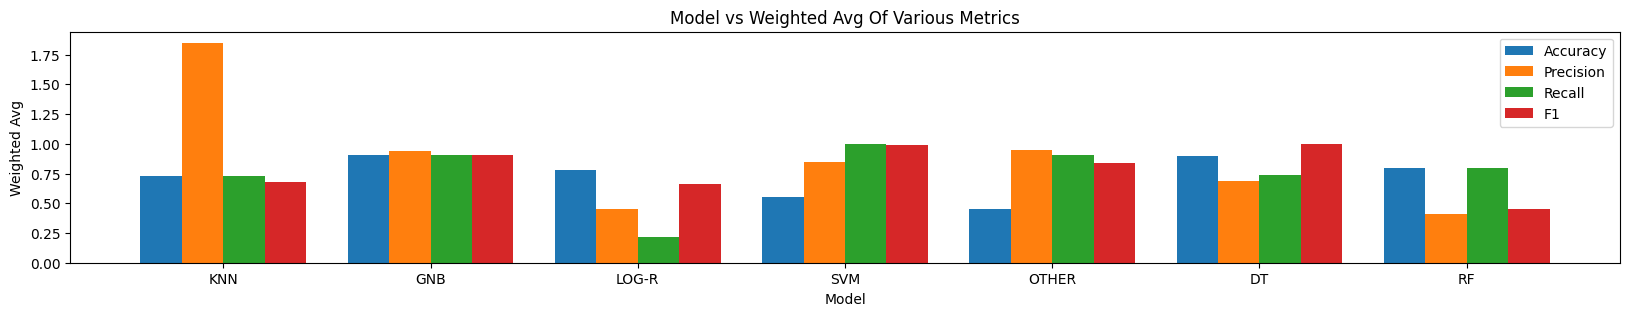

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'GNB', 'LOG-R', 'SVM', 'OTHER', 'DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.73, 0.91, 0.78, 0.55, 0.45, 0.90, 0.80]
precision = [1.85, 0.94, 0.45, 0.85, 0.95, 0.69, 0.41]
recall = [0.73, 0.91, 0.22, 1.00, 0.91, 0.74, 0.80]
f1 = [0.68, 0.91, 0.66, 0.99, 0.84, 1.00, 0.45]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


**Extra Notes**

In [ ]:
# the last code has not been done yet --> check record 12/2

In [ ]:
#  https://www.kaggle.com/datasets?search=classification+data&page=4
#  https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset
#   https://www.kaggle.com/datasets/raones/life-science-irish-flowers-classification-data
#  https://www.weatherapi.com/api-explorer.aspx#astronomy
#   https://startbootstrap.com/theme/resume

In [ ]:
#  https://www.pythonanywhere.com/user/cchan6/webapps/#tab_id_cchan6_pythonanywhere_com
#   https://www.pythonanywhere.com/user/cchan6/files/home/cchan6/mysite/flask_app.py?edit

#  https://docs.google.com/document/d/1kZbQamv6q5ik828mgV_Mpi1pyEbdlB7ig-LwV9Jefqo/edit   --> Merge, HW3-1

In [ ]:
# prof codes
#   https://www.pythonanywhere.com/user/aj3120/shares/a57b0c8fda504b3db26fee94c6cf8178/

#   https://www.pythonanywhere.com/user/aj3120/shares/7d7136bcc5f44cf38cd7ea264258a820/

In [ ]:
# https://github.com/Katsute/Baruch-CIS-3120/blob/main/assignments/HW2/HW2.py